In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df= pd.read_csv("housing.csv")

In [23]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# longitude (долгота): географическое положение дома или объекта недвижимости по долготе.
# latitude (широта): географическое положение дома или объекта недвижимости по широте.
# housing_median_age (средний возраст жилья): средний возраст домов в районе.
# total_rooms (общее количество комнат): общее количество комнат в районе.
# total_bedrooms (общее количество спален): общее количество спален в районе.
# population (население): общее население района.
# households (домохозяйства): количество домохозяйств в районе.
# median_income (средний доход): медианный доход домохозяйства в районе.
# median_house_value (медианная стоимость жилья): медианная стоимость домов в районе.
# ocean_proximity (близость к океану): категориальная переменная, указывающая на близость района к океану (например, "NEAR BAY" - близость к заливу).

<AxesSubplot:>

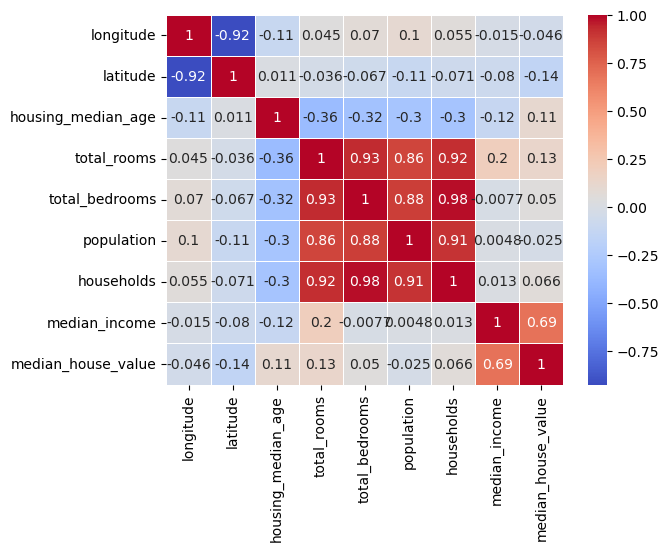

In [4]:
matrix=df.corr()
sns.heatmap(matrix, annot=True, cmap='coolwarm',linewidths=0.5)

# сильнее всего на стоимость дома влияет средний доход

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

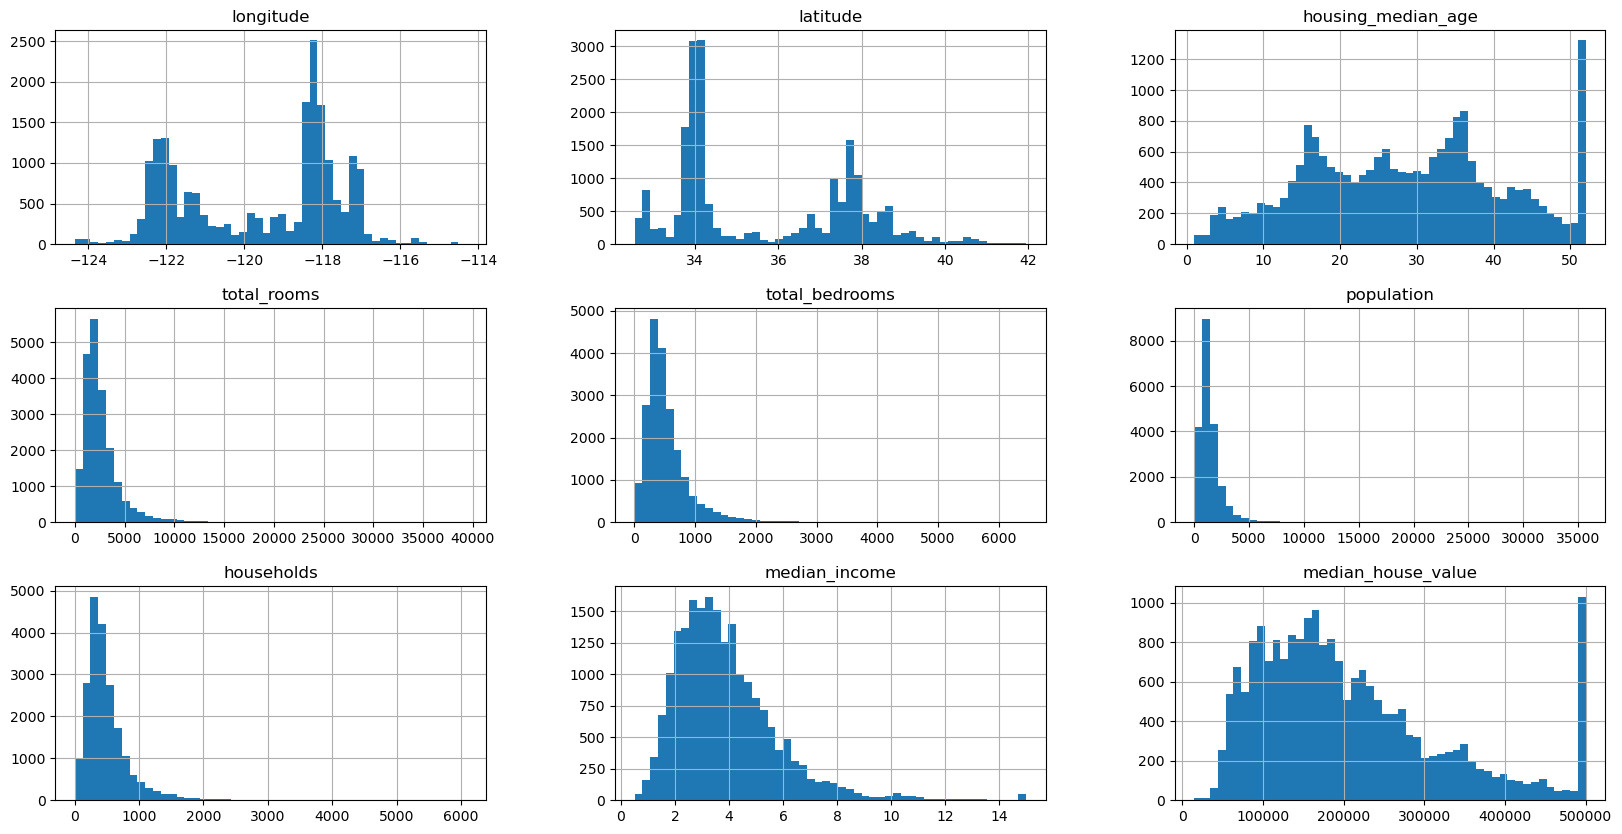

In [7]:
df.hist(bins=50,figsize=(20,10))

<AxesSubplot:>

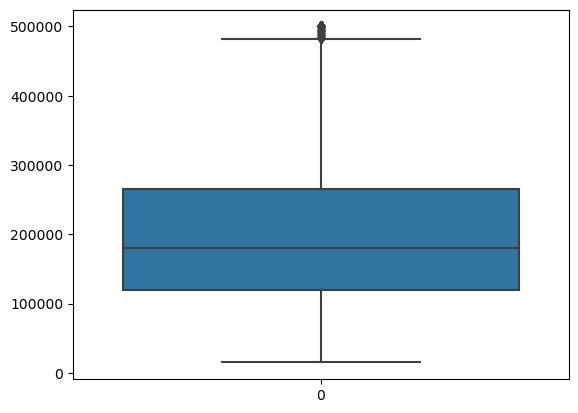

In [ ]:
sns.boxplot(df["median_house_value"])

<AxesSubplot:ylabel='median_house_value'>

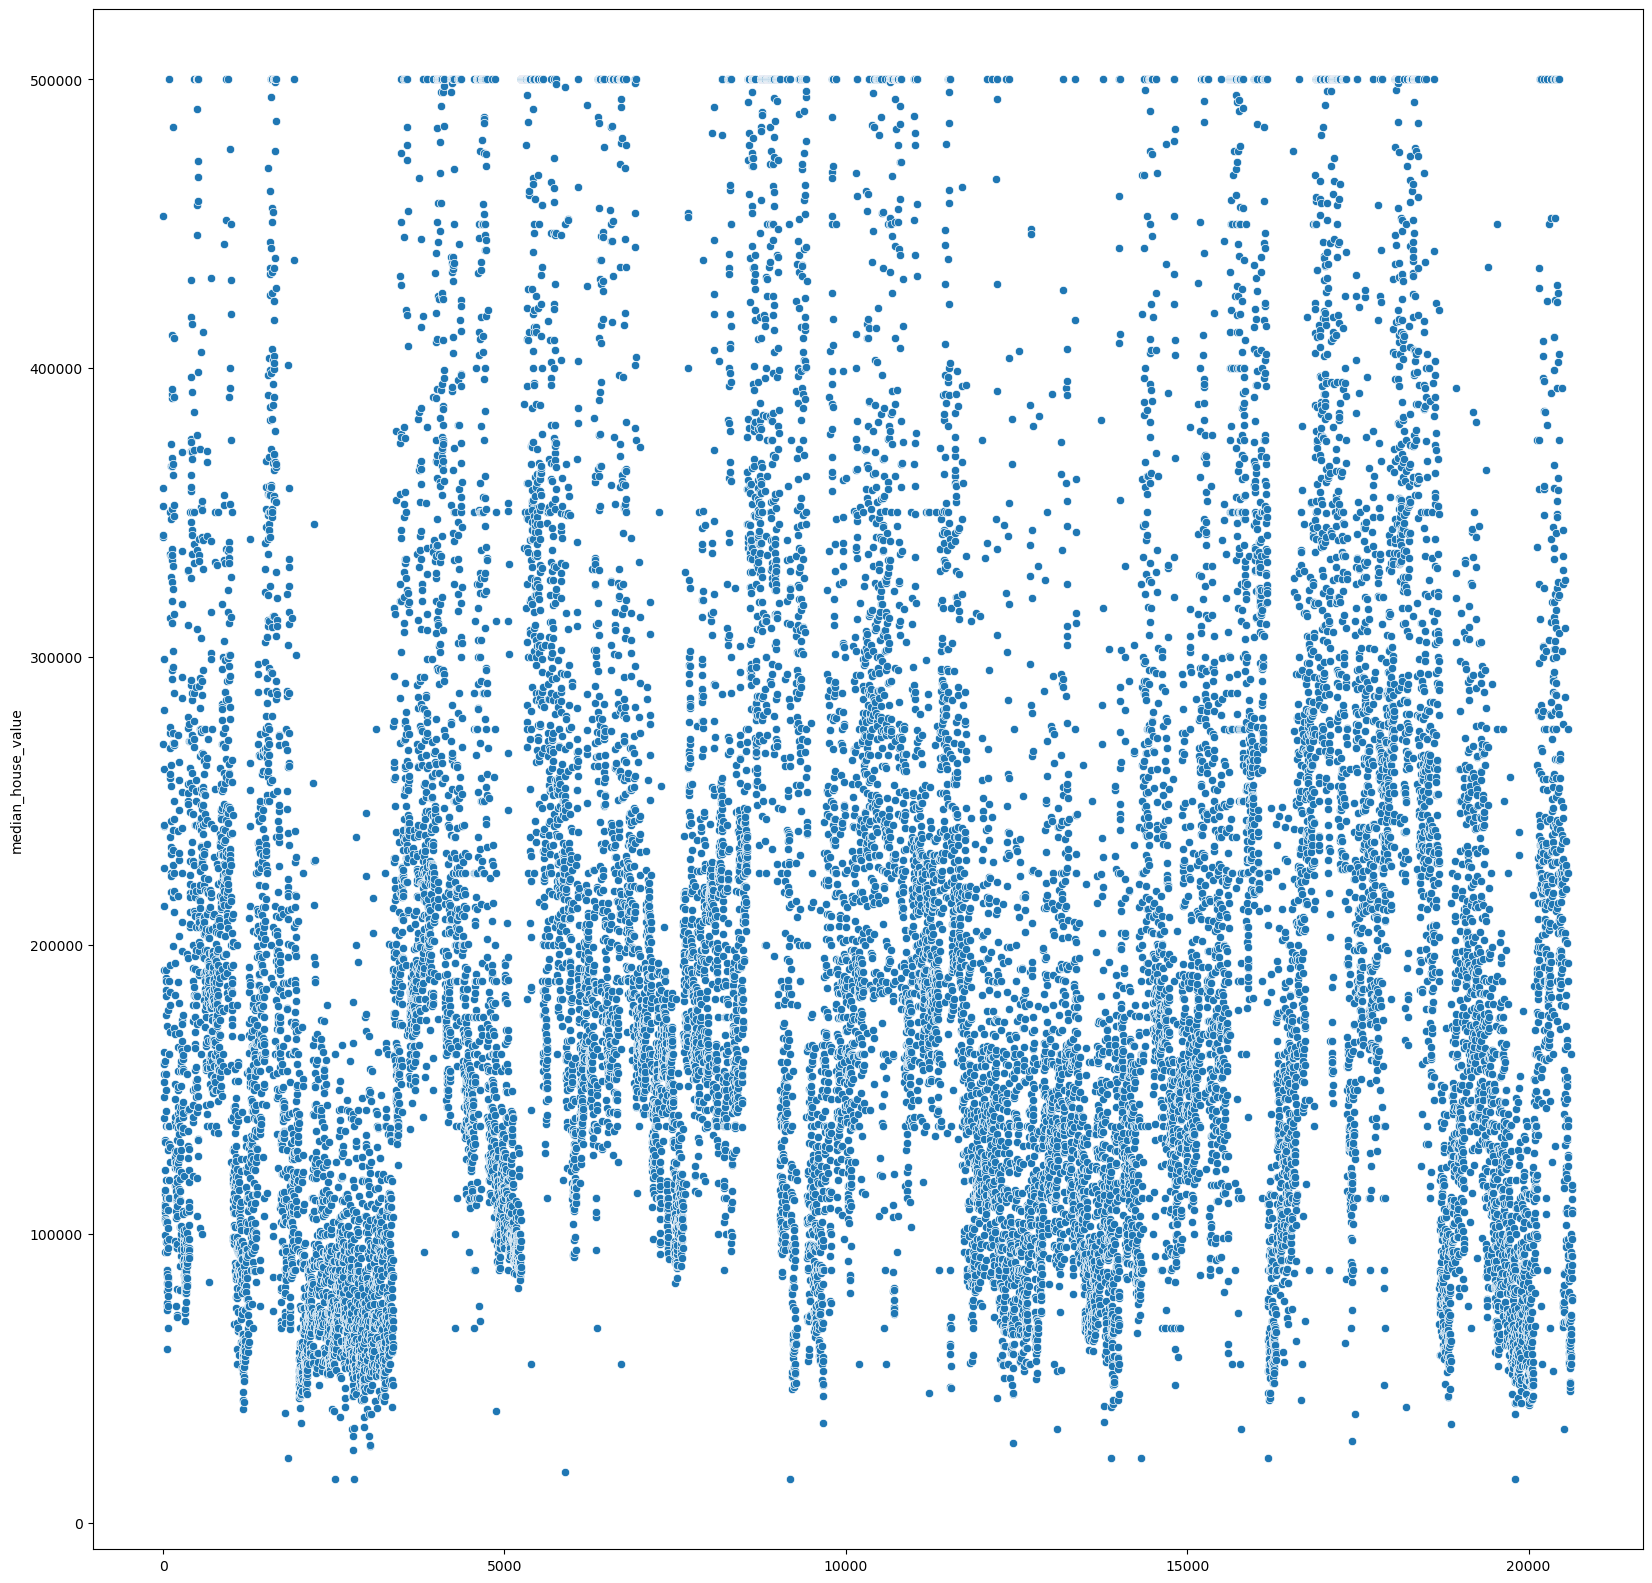

In [ ]:
plt.figure(figsize=(20,20))
sns.scatterplot(df["median_house_value"])

# судя по верхним двум графикам у целевого атрибута присутствуют выбросы

In [8]:
df[df["median_house_value"]>500000].shape[0]

965

In [26]:
pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 13.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
import folium
from folium.plugins import HeatMap

# плотность разных частей штата

In [28]:
california_map = folium.Map(location=[36.7783, -119.4179], zoom_start=6, min_zoom=5)
df_map = df[['latitude', 'longitude']]

data = [[row['latitude'], row['longitude']] for index, row in df_map.iterrows()]
HeatMap(data, radius=10).add_to(california_map)

california_map

# предварительная обработка данных 

In [17]:
df["ocean_proximity"].unique()


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [3]:
distance_to_ocean = {
    'NEAR BAY': 2,
    '<1H OCEAN': 4,
    'INLAND': 1,
    'NEAR OCEAN': 3,
    'ISLAND': 5
}
df['ocean_proximity'] = df['ocean_proximity'].map(distance_to_ocean)
min_value = df['ocean_proximity'].min()
max_value = df['ocean_proximity'].max()
df['ocean_proximity'] = (df['ocean_proximity'] - min_value) / (max_value - min_value)

In [4]:
median_value = df['total_bedrooms'].median()

df['total_bedrooms'].fillna(median_value, inplace=True)

In [8]:
df1=df[::5]
df1.shape[0]

4128

# логистическая регрессия всех атрибутов и целевого атрибута

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('median_house_value', axis=1)
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(penalty = 'l1', C=1.0, solver = 'liblinear')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy, 2))

Mean Squared Error (MSE): 25882839472.08737
0.05


# регрессия целевого атрибута и атрибутов с высшей корелляцией

In [9]:
X = df.drop(['median_house_value', 'longitude', 'total_bedrooms', 'population', 'households'], axis=1)
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(penalty = 'l1', C=1.0, solver = 'liblinear')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [10]:
print("Mean Squared Error (MSE):", mse)
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy, 2))

Mean Squared Error (MSE): 25882839472.08737
0.05


# регуляризация L2

In [17]:
model2 = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)
model2.fit(X_train, y_train) 
predictions = model2.predict(X_test)  

In [18]:
print(predictions[:1000])
print(y_test[:1000])

[ 87500.  81300. 500001. 500001. 500001. 141000. 500001. 500001. 137500.
 500001. 112500. 500001. 150000. 150000. 500001. 500001. 500001. 112500.
 500001. 137500. 500001. 500001. 500001. 500001. 500001. 112500. 150000.
 350000. 137500. 500001. 137500. 162500. 187500. 500001. 500001. 500001.
 350000. 500001.  93800. 162500. 500001. 137500. 112500. 500001. 141000.
 500001. 500001. 500001. 225000. 500001. 350000. 150000. 162500. 137500.
 225000. 500001.  69400. 500001. 500001. 500001. 500001. 225000.  87500.
  74100. 500001. 500001. 137500. 145900. 150000. 162500.  75900. 500001.
 137500. 500001. 500001. 350000. 500001. 500001. 500001. 225000. 137500.
 162500. 162500. 187500. 500001. 500001.  81300. 137500. 150000. 187500.
 500001. 500001. 112500. 112500. 137500. 125000. 500001. 162500. 137500.
 500001. 137500. 500001. 500001. 500001. 500001. 162500. 162500. 500001.
 500001. 137500. 118800. 500001. 500001. 500001. 500001. 162500. 350000.
 500001. 500001. 500001. 217000. 500001. 500001. 22

In [19]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Mean Squared Error (MSE): 32935141331.32203
Accuracy: 0.046511627906976744


# бинарная классификация стоимости выше 200000 

In [21]:
y_binary = (y > 200000).astype(int)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.046511627906976744


In [22]:
print(predictions[:1000])
print(y_test[:1000])

[ 87500.  81300. 500001. 500001. 500001. 141000. 500001. 500001. 137500.
 500001. 112500. 500001. 150000. 150000. 500001. 500001. 500001. 112500.
 500001. 137500. 500001. 500001. 500001. 500001. 500001. 112500. 150000.
 350000. 137500. 500001. 137500. 162500. 187500. 500001. 500001. 500001.
 350000. 500001.  93800. 162500. 500001. 137500. 112500. 500001. 141000.
 500001. 500001. 500001. 225000. 500001. 350000. 150000. 162500. 137500.
 225000. 500001.  69400. 500001. 500001. 500001. 500001. 225000.  87500.
  74100. 500001. 500001. 137500. 145900. 150000. 162500.  75900. 500001.
 137500. 500001. 500001. 350000. 500001. 500001. 500001. 225000. 137500.
 162500. 162500. 187500. 500001. 500001.  81300. 137500. 150000. 187500.
 500001. 500001. 112500. 112500. 137500. 125000. 500001. 162500. 137500.
 500001. 137500. 500001. 500001. 500001. 500001. 162500. 162500. 500001.
 500001. 137500. 118800. 500001. 500001. 500001. 500001. 162500. 350000.
 500001. 500001. 500001. 217000. 500001. 500001. 22

In [23]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Mean Squared Error (MSE): 32935141331.32203
Accuracy: 0.046511627906976744
